# White noise / correlated noise


In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

## 1. White noise

We consider a series of measurements $X_i$ ($i\in[|1,n|]$).
We assume that each measurement is a random variable following a normal distribution with mean $\mu$ and standard deviation (errorbar) $\sigma$.
The mean $\mu$ is the quantity of physical interest that we would like to measure precisely.

### Case n = 2
As a first step, we will take $n=2$, and only consider two independent measurements $X_1$ and $X_2$.
However, we will simulate several realizations of $X_1$ and $X_2$, which can be seen as several parallel worlds in which the result of the random experiment is different.
We call $n_\mathrm{samp}$ the number of samples (or realizations).

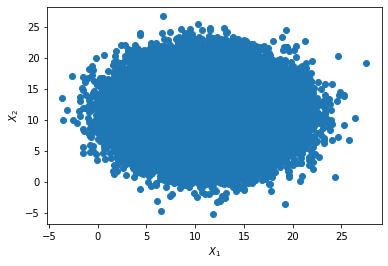

Stats:
------------------------------
Analytical Values: 
E(M2) =  11.2
std(M2) =  2.47

------------------------------
Numerical Values: 
E(M2) =  11.197402166117893
std(M2) =  2.47429346233141

------------------------------
Their covariance: 
cov(X1, X2) = 0.005608336336960065


In [2]:
# Settings
mu = 11.2
sigma = 3.5
nsamp = 100000

# Generate samples
X1 = np.random.normal(mu,sigma,nsamp)
X2 = np.random.normal(mu,sigma,nsamp)

# Plot samples
plt.figure()
plt.scatter(X1, X2)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

# Mean of the two measurements for each sample
M2 = (X1+X2)/2 # M2 is an array of size nsamp

# Check stats
print('Stats:')
print('------------------------------')
print('Analytical Values: ')
print('E(M2) = ', 11.2) # (average over samples)
print('std(M2) = ', 2.47)
print('')
print('------------------------------')
print('Numerical Values: ')
print('E(M2) = ', np.mean(M2))
print('std(M2) = ', np.std(M2))
print('')
print('------------------------------')
print('Their covariance: ')
print('cov(X1, X2) =', np.cov(X1,X2)[0,1])

What did you expect (theoretical values) for all these stats?

Given that $E(X1) = E(X2) = 11.2$ and $\sigma_{X1} = \sigma_{X2} = 3.5$, and since both of these variables are independent of each other, $cov(X1, X2) = 0$.

$$E(M2) = E\left(\frac{X1 + X2}{2}\right) = \frac{E(X1) + E(X2)}{2} = 11.2$$

And,

$$var(M2) = var\left(\frac{X1 + X2}{2}\right) = \frac{var(X1) + var(X2)}{4}$$

Thus,

$$\sigma_{M2} = \sqrt{var(M2)} = \sqrt{\frac{\sigma_{X1}^2 + \sigma_{X2}^2}{2}} = \sqrt{\frac{3.5^2 + 3.5^2}{2}} \simeq 2.47$$

The analytical values of mean and standard deviation matches well with their numerical counterparts.

### Generalization for n > 2

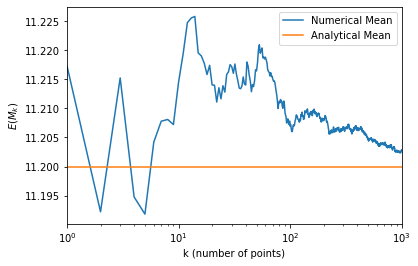

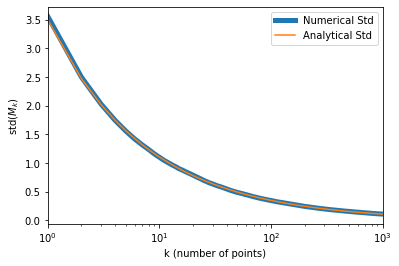

In [3]:
# Settings
mu = 11.2
sigma = 3.5
n = 1000          # Number of measurements
nsamp = 5000      # Number of realisations

# Generate samples
# X is now a matrix with n independent measurements and nsamp realizations
X = np.random.normal(mu, sigma, n*nsamp).reshape((n,nsamp)) 

# Mean of the k first measurements for k in [1,n] and for each sample
M = np.empty((n,nsamp))
for k in range(n):
    M[k] = np.mean(X[:k+1], axis=0) # Compute Mk = (X[0] + ... + X[k])/(k+1) for each sample

# Check stats
meanM = np.mean(M, axis=1) # Average over samples
stdM = np.std(M, axis=1)
ks = np.arange(1,n+1)

# Analytical Calculations
mean_ana = np.ones(len(ks))*11.2
std_ana = np.array([])
yy = 0
for i in range(len(ks)):
    zz = yy + sigma**2
    zz1 = np.sqrt(zz)
    zz2 = zz1/(i+1)
    std_ana = np.hstack((std_ana, zz2))
    yy = zz

plt.figure()
plt.plot(ks, meanM, label='Numerical Mean')
plt.plot(ks, mean_ana, label='Analytical Mean')
plt.legend()
plt.xscale('log')
plt.xlim(1,n)
plt.xlabel('k (number of points)')
plt.ylabel('$E(M_k)$')
plt.show()

plt.figure()
plt.plot(ks, stdM, lw=5, label='Numerical Std')
# Overplot theoretical prediction here...
plt.plot(ks, std_ana, label='Analytical Std')
plt.xscale('log')
plt.legend()
plt.xlim(1,n)
plt.xlabel('k (number of points)')
plt.ylabel('$\mathrm{std}(M_k)$')
plt.show()

Comment these results.
What did you expect (theoretically) for the standard deviation? (overplot it)

Since covariance among all of the measurements is still 0,

$$E(X1, ..., Xn) = \frac{E(X1) + ... + E(Xn)}{n} = 11.2$$

And,

$$\sigma_{X1,...,Xn} = \frac{\sqrt{\sigma_{X1}^2 + ... + \sigma_{Xn}^2}}{n}$$

## 2. Correlated noise (calibration)

A very simple example of correlated noise is the case of calibration noise.
We consider a very similar case as before, but we now assume that the instrument needs some calibration to determine the zero point.
Each measurement taken with this instrument is affected by a constant (deterministic) offset $\mu_Z$, so it follows a normal distribution with mean $\mu+\mu_Z$ and standard deviation $\sigma$.
The quantity of physical interest is still $\mu$.

In order to correct from this offset, another experiment was performed to measure it with higher precision.
We thus obtained an estimate of the offset $Z$,
which follows a normal distribution with mean $\mu_Z$ and standard deviation $\sigma_Z$ ($\ll\sigma$).

Then each measurement $X_i$ is corrected from the offset to obtain a calibrated value $Y_i = X_i - Z$.

Adapt the code of question 1) to generate samples for $Y$.
Repeat all the analysis of question 1):
- scatter plot of $Y_1$ vs $Y_2$,
- Expectation and standard deviation of $Y_i$,
- Covariance of $Y_i$ and $Y_j$,
- Mean of the k first calibrated measurements ($M_k = \frac{1}{k}\sum_{i\leq k} Y_i$),
- Expectation and standard deviation of $M_k$,
- Compare theoretical predictions with numerical experiment.

### Analytical Calculation of correlated noise:

What we are measuring $n$ observations for $Y_i = X_i - Z$, and we want to measure mean of all measurements of $Y$ and an error in it. We know that the expectation and standard deviation of $X_i$ is $\mu + \mu_Z$ and $\sigma$ respectively. On the other hand, the mean and standard deviation of $Z$ would be, $\mu_Z$ and $\sigma_Z$.

$$Y = \frac{1}{k} \sum_k (X_k - Z) = \left( \frac{1}{k} \sum_K X_k \right) - Z$$

That means,

$$ E(Y) = \left( \frac{1}{k} \sum_k E(X_i) \right) - E(Z) = \frac{1}{k} k(\mu + \mu_Z) - \mu_Z = \mu $$

Further,

$$var(Y) = \left( \frac{1}{k^2} \sum_k var(X_k) \right) + var(Z) = \frac{1}{k^2} k \sigma^2 + \sigma_Z = \frac{sigma^2}{k} + \sigma_Z$$

$$\Rightarrow \sigma_Y = \sqrt{\frac{\sigma^2}{k} + \sigma_Z} $$

We can also calculate the covariance between two measurements,

\begin{equation*}
    \begin{split}
        cov(Y_i, Y_j) &= cov(X_i - Z, Y_j) \\
        &= cov(X_i, Y_j) - cov(Z, Y_j) \\
        &= cov(X_i, X_j - Z) - cov(Z, X_j - Z) \\
        &= cov(X_i, X_j) - cov(X_i, Z) - cov(Z, X_j) + cov(Z,Z) \\
        &= cov(Z,Z) = var(Z, Z) \\
        &= \sigma_Z^2
    \end{split}
\end{equation*}

In the last to second line, we used the fact that $X_i$ and $X_j$, $X_i$ and $Z$, $Z$ and $X_j$ are independent of each other making their covariance zero.

In [4]:
# TODO
def fun(n=1000, stats=False, sample=False, sigmaZ=0.5, plots=False):
    # Settings
    mu = 11.2
    sigma = 3.5
    muZ = 1.2
    sigmaZ = sigmaZ # play with this value
    nsamp = 5000
    X1 = np.random.normal(mu + muZ, sigma, nsamp*n).reshape((n, nsamp))
    Z = np.random.normal(muZ, sigmaZ, nsamp)
    Y1 = X1-Z
    
    # Mean of the k first measurements for k in [1,n] and for each sample
    M1 = np.empty((n,nsamp))
    for k in range(n):
        M1[k] = np.mean(Y1[:k+1], axis=0) # Compute Mk = (X[0] + ... + X[k])/(k+1) for each sample
    
    # Check stats (Numerical)
    meanM1 = np.mean(M1, axis=1) # Average over samples
    stdM1 = np.std(M1, axis=1)
    ks1 = np.arange(1,n+1)
    
    # Analytical
    
    meanM1_ana = np.ones(len(ks1))*mu
    stdM1_ana = np.sqrt((sigma**2/ks1) + sigmaZ**2)
    stdM1_ana_white = sigma/np.sqrt(ks1)
    std_cali = np.ones(len(ks1))*sigmaZ
    
    if stats == True:
        print(meanM1)
        print(stdM1)
        
    if plots == True:
        plt.figure()
        plt.plot(ks1, meanM1, label = 'Numerical Values')
        plt.plot(ks1, meanM1_ana, label = 'Analytical Values')
        plt.xscale('log')
        plt.legend()
        plt.xlim(1,n)
        plt.xlabel('k (number of points)')
        plt.ylabel('$E(M_k)$')
        plt.show()

        plt.figure()
        plt.plot(ks1, stdM1, lw=5, label = 'Numerical Values')
        # Overplot theoretical prediction here...
        plt.plot(ks1, stdM1_ana, label = 'Analytical Values')
        plt.plot(ks1, stdM1_ana_white, label = 'White Noise values')
        plt.plot(ks1, std_cali, label = 'Calibration Noise')
        plt.xscale('log')
        plt.legend()
        plt.xlim(1,n)
        plt.xlabel('k (number of points)')
        plt.ylabel('$\mathrm{std}(M_k)$')
        plt.show()
    
    if sample ==True:
        return Y1, M1

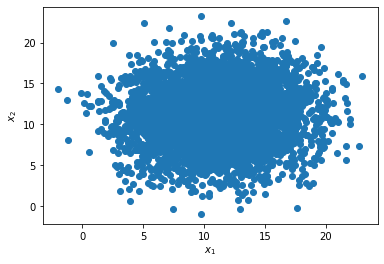

Stats:
------------------------------
Analytical Values: 
E(M22) =  11.2
std(M22) =  2.47
cov(X1, X2)=  0.25

------------------------------
Numerical Values: 
E(M22) =  11.213419511325023
std(M22) =  2.555710463509362
cov(X1, X2) = 0.50713617712188

------------------------------


In [5]:
sigZ = 0.5
Y1, M11 = fun(n=2, sample=True, sigmaZ=sigZ)

x1 = Y1[0]
x2 = Y1[1]

# Plot samples
plt.figure()
plt.scatter(x1, x2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Mean of the two measurements for each sample
M22 = M11[1] # M2 is an array of size nsamp

# Check stats
print('Stats:')
print('------------------------------')
print('Analytical Values: ')
print('E(M22) = ', 11.2) # (average over samples)
print('std(M22) = ', 2.47)
print('cov(X1, X2)= ', sigZ**2)
print('')
print('------------------------------')
print('Numerical Values: ')
print('E(M22) = ', np.mean(M22))
print('std(M22) = ', np.std(M22))
print('cov(X1, X2) =', np.cov(x1,x2)[0,1])
print('')
print('------------------------------')

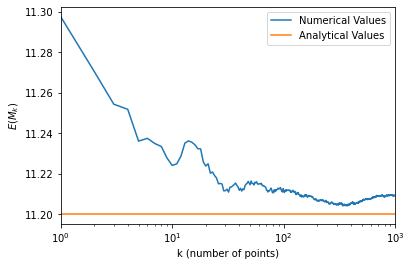

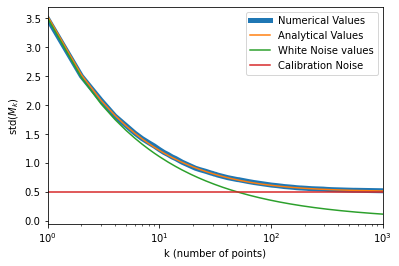

In [6]:
fun(n=1000, plots=True)